Here we explore a dataset to find linear relationships between different features.  We choose arbitrarily a robust dataset where linear relationships may exist.  
As an example here we will use NBA statistics from the 2022 season taken from [www.basketball-reference.com](https://www.basketball-reference.com/)

  
## Process:
 - Clean Data
 - Develop Model
 - Analyze Results


Import Dependencies

In [1]:

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from itertools import combinations, permutations

%matplotlib inline

In [2]:
print(f'numpy version: {np.__version__}')
print(f'pandas version: {pd.__version__}')

numpy version: 1.26.0
pandas version: 2.1.1


Goal: Find NBA statistic categories that correlate

## Import the data from csv
### Here we use NBA data from 2021-2022 season


In [3]:
data = pd.read_csv('./data/nba2022-working.csv')

To remove unhelpful data,
We will remove players who played in less than 20 games in the season.

In [4]:
filtered_data = data[data['G'] >= 20]
filtered_data.reset_index(drop=True, inplace=True)

Additionally we remove categorical data and labelling data

we (naively) assume there is no connection between categorical data and numerical data.

In [5]:
columns_to_remove = ['Rk','Player','Pos','Tm','GS','FG','3P','2P','eFG%','FT','FTA','FT%','TRB','PF','Player-additional']
trimmed_filtered_data = filtered_data.drop(columns=columns_to_remove)

trimmed_filtered_data = trimmed_filtered_data.apply(pd.to_numeric, errors='ignore')
trimmed_filtered_data = trimmed_filtered_data.astype(int, errors='ignore')

Preview of data:

In [6]:
trimmed_filtered_data.head()

,Age,G,MP,FGA,FG%,3PA,3P%,2PA,2P%,ORB,DRB,AST,STL,BLK,TOV,PTS
0,22,73,1725,603,0.439,156,0.359,447,0.468,146,327,82,37,41,84,664
1,28,76,1999,384,0.547,1,0.000,383,0.548,349,411,256,65,60,115,528
2,24,56,1825,729,0.557,6,0.000,723,0.562,137,427,190,80,44,148,1068
3,21,32,360,132,0.402,48,0.125,84,0.560,33,54,21,6,10,16,132
4,36,47,1050,458,0.550,46,0.304,412,0.578,73,185,42,14,47,44,607


Helper Functions

In [7]:
def predict(m,b,x):
    return m*x+b

def mean(x):
    s = 0
    for i in range(len(x)):
        s += x[i]
    return s/len(x)

In [12]:

def get_r2_show(col1,col2,show_step=True):
    '''
    params:
        col1:  list of data for the Independent Variable
        col2:  list of data for the dependent variable
        show_step:  bool, optional True for printing details and graphs


    returns:
        a plot of the linear regression line with data
        the r^2 value for the linear regression 
            performed on the two lists of data


    '''

    X = col1
    Y = col2

    mean_X = np.mean(X)
    mean_Y = np.mean(Y)
    if show_step:
        print(f'length of col1 = {len(X)}, length of col2 = {len(Y)}')
        print(f'mean of col1 = {mean_X:.2f}, mean of col2 = {mean_Y:.2f}')
    n = len(X)

    top = 0
    bottom = 0
    for i in range(n):
        X_resid = (X[i] - mean_X)
        Y_resid = (Y[i] - mean_Y)
    top += X_resid * Y_resid
    bottom += X_resid ** 2
    m = top / bottom
    b = mean_Y - (m * mean_X)

    if show_step:
        print(f'm = {m:.4f}, b={b:.4f}')
        print(f'y = mx + b')
        # plot
        max_x = np.max(X) + np.max(X)*.1
        min_x = np.min(X) - np.min(X)*.1

    
        x = np.linspace (min_x, max_x, 100)
        y = predict(m=m,b=b,x=x)

        plt.plot(x, y, color='#26bf30', label='Regression Line')
        plt.scatter(X, Y, c='#602c8a', label='Samples')

        plt.xlabel(col1.name)
        plt.ylabel(col2.name)
        plt.legend()
        plt.show()


    sum_of_squares = 0
    sum_of_residuals = 0

    for i in range(len(X)):
        prediction = predict(m=m,b=b,x=X[i])
        sum_of_squares += (Y[i] - mean_Y) ** 2
        sum_of_residuals += (Y[i] - prediction) ** 2

    r2 = 1 - (sum_of_residuals/sum_of_squares)
    if show_step: print(r2)
    return r2


length of col1 = 443, length of col2 = 443
mean of col1 = 26.02, mean of col2 = 479.42
m = -7.7192, b=680.2617
y = mx + b


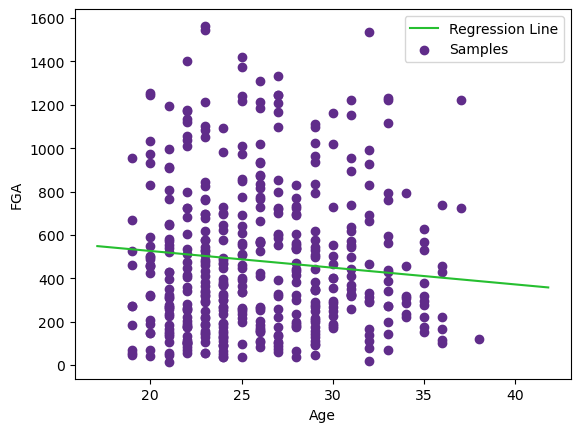

-0.01209524974037346


-0.01209524974037346

In [13]:
get_r2_show(trimmed_filtered_data['Age'],trimmed_filtered_data['FGA'])

Below, we have a method the same calculation but no graphical output.

In [10]:

def get_r2(col1,col2):
    '''
    params:
        col1:  list of data for the Independent Variable
        col2:  list of data for the dependent variable
        


    returns:
        the r^2 value for the linear regression 
            performed on the two lists of data


    '''
    assert(len(col1)==len(col2))
    
    X = col1
    Y = col2
    
    
    mean_X = mean(X)
    mean_Y = mean(Y)
    
    n = len(X)

    top = 0
    bottom = 0
    for i in range(n):
        X_resid = (X[i] - mean_X)
        Y_resid = (Y[i] - mean_Y)
    top += X_resid * Y_resid
    bottom += X_resid ** 2
    m = top / bottom
    b = mean_Y - (m * mean_X)

    


    sum_of_squares = 0
    sum_of_residuals = 0

    for i in range(len(X)):
        prediction = predict(m=m,b=b,x=X[i])
        sum_of_squares += (Y[i] - mean_Y) ** 2
        sum_of_residuals += (Y[i] - prediction) ** 2

    r2 = 1 - (sum_of_residuals/sum_of_squares)
    
    return r2

We seek columns that are highly correlated. Those columns will have a high $r^2$ value
 
Next we perform a linear regression on all combinations of columns in the data

And print the combinations where $r^2 > 0.5$

In [11]:
column_names = list(trimmed_filtered_data.columns)

for pair in combinations(column_names, 2): 
    
    
    r2 = get_r2(trimmed_filtered_data[pair[0]],trimmed_filtered_data[pair[1]])
    if r2 > 0.5:
        print(f'IV: {pair[0]}, DV: {pair[1]}')
        print(f'r2 = {r2:.4f}')

IV: G, DV: MP
r2 = 0.6490
IV: MP, DV: 2PA
r2 = 0.5255
IV: MP, DV: TOV
r2 = 0.5842
IV: MP, DV: PTS
r2 = 0.6667
IV: FG%, DV: 2P%
r2 = 0.6131
IV: 2PA, DV: TOV
r2 = 0.7429
IV: 2PA, DV: PTS
r2 = 0.6389
IV: ORB, DV: DRB
r2 = 0.5058
IV: ORB, DV: BLK
r2 = 0.5395
IV: TOV, DV: PTS
r2 = 0.6594


$r^2$ the percentage of the dependent variable variation that a linear model explains.

We notice some correlation between columns of data.  But $r^2$ values do not tell the entire story.  Low $r^2$ values are expected in cases where there is some unexplainable variation.  

Additionally low $r^2$ scores are frequently found in studies where human behavior is considered.  